# Kaggle:预测房价

The prediction of housing price   

Data source:(www.kaggle.com)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import pandas as pd
housing=pd.read_csv('housing.csv')
housing.info()
#载入数据并快速查看数据结构
#十列数据分别为，经度，纬度，房龄中位数，总房间数，总卧室数，人口，家庭数，收入中位数，房价中位数，地理位置
#前九列数据类型为浮点型，最后一列为字符串型
#total_bedrooms有207个缺失值
#根据9个特征（feature）预测房价中位数（label），是一个典型的回归任务（regression task）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


There are ten columns of data. The 'median_house_value' is the output label and the rest of nine columns are the input feature. This is a classic regression task. The column of total_bedrooms has 207 missing value.

# 1.观察特征和标签的关系

# 1.1分析标签(median_house_value)

The analysis of output label(median_house_value)

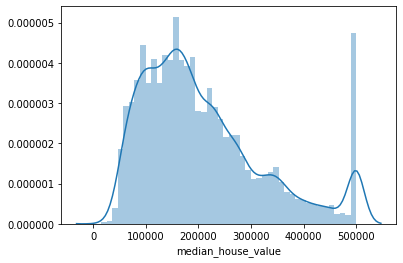

In [2]:
sns.distplot(housing['median_house_value'])
#查看标签median_house_value分布
#尾部存在异常值，需要删除

Through histogram, we can discover that the outlier is existed on the right tail of the distribution and needed to be removed.

In [3]:
housing=housing[housing['median_house_value']!=500001]
#删除median_house_value异常值500001

Skewness:0.8095716609476848
Kurtosis:0.16295434366478867


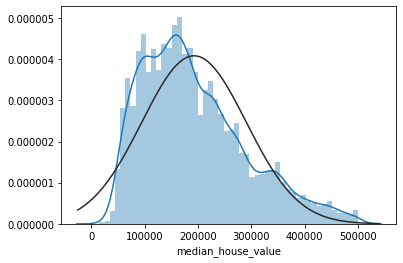

In [4]:
from scipy import stats
from scipy.stats import norm
sns.distplot(housing['median_house_value'],fit=norm)
print("Skewness:" +str(housing['median_house_value'].skew()))
print("Kurtosis:" +str(housing['median_house_value'].kurt()))
#查看去除异常值后的median_house_value分布
#skewness>0,右偏，长尾在右边
#kurtosis>0,尖峰，更陡峭

After deleting the outlier, we calculated the skewness and kurtosis of the distribution. The result implied that the distribution of 'median_house_value' is leptokurtic and right skewness.

Skewness:-0.29480479438186263
Kurtosis:-0.3678195256867913


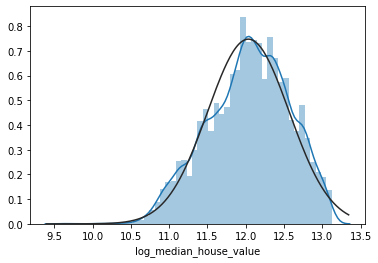

<Figure size 432x288 with 0 Axes>

In [5]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
housing['log_median_house_value']=np.log(housing['median_house_value'])
sns.distplot(housing['log_median_house_value'],fit=norm)
fig = plt.figure()
#res = stats.probplot(housing['log_median_house_value'], plot=plt)
print("Skewness:" +str(housing['log_median_house_value'].skew()))
print("Kurtosis:" +str(housing['log_median_house_value'].kurt()))
#尝试对median_house_value进行log变形，使其接近正太分布
#skewness绝对值小于变换前，偏离程度有所缓解
#kurtosis小于0，比正太分布来得平缓

Median_house_value is not normal. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness(right skewness), log transformations usually works well. 

# 1.2分析离散型特征(ocean_proximity)

The analysis of categorical input feature(ocean_proximity)

In [6]:
housing['ocean_proximity'].value_counts()
#查看离散型特征统计,有五个离散值

<1H OCEAN     8604
INLAND        6524
NEAR OCEAN    2446
NEAR BAY      2096
ISLAND           5
Name: ocean_proximity, dtype: int64

(-0.5, 4.5, 0, 600000)

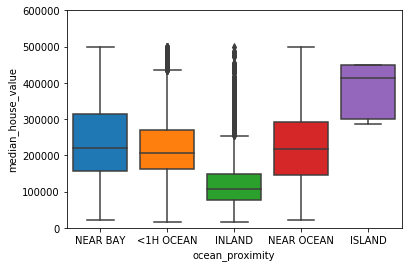

In [7]:
var = 'ocean_proximity'
data = pd.concat([housing['median_house_value'], housing[var]], axis=1)
fig = sns.boxplot(x=var, y="median_house_value", data=data,saturation=1)
fig.axis(ymin=0, ymax=600000)
#箱形图四分位，inland区域房价较低，island区域价格较高，其他三个差不多

By the means of box-plot, we can conclude that 'median_house_value' of ISLAND area is higher than other district and the house value of INLAND is the lowest in five categories.

# 1.3分析连续型特征

# 1.3.1 The analysis of continuous input feature(median_income)

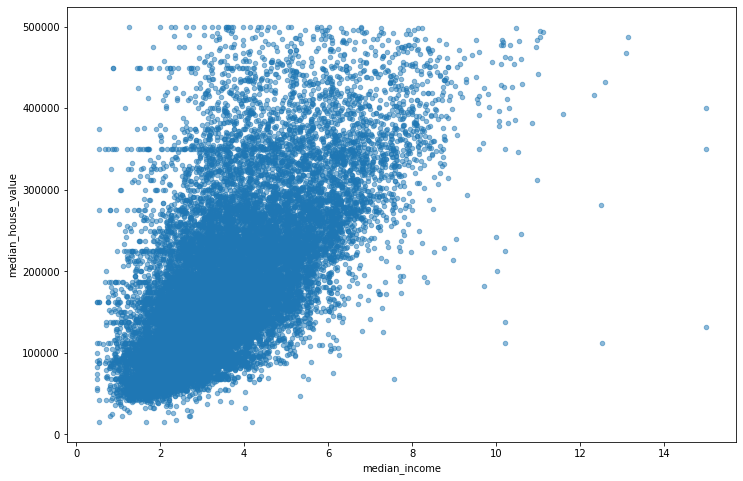

In [8]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.5,figsize=(12,8))
#查看收入中位数和房价中位数的关系
#median_house_value有取值上限的异常值，需要删除[450000,350000,275000,225000]

It seems that 'median_house_value' and 'median_income' are really old friends, with a linear relationship. The scatter plot shows that the value of 'median_house_value' has outliers among the number of 450000,350000,275000 and 225000 and required to be cleaned.

In [9]:
for i in [450000,350000,275000,225000]:
    housing=housing[housing['median_house_value']!=i]
#housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.5,figsize=(12,8))
#房价中位数和收入中位数有比较明显的线性关系

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()
#查看每个连续型特征柱状图
#房龄中位数有上限设置52，这些数据需要删除

# 1.3.2 The analysis of continuous input feature(housing_median_age)

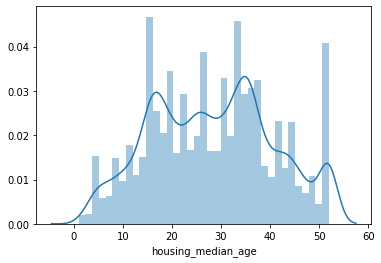

In [10]:
sns.distplot(housing['housing_median_age'])

The value of 52 is the outlier. Because during the data collecting, there is an upper limit of number 52.

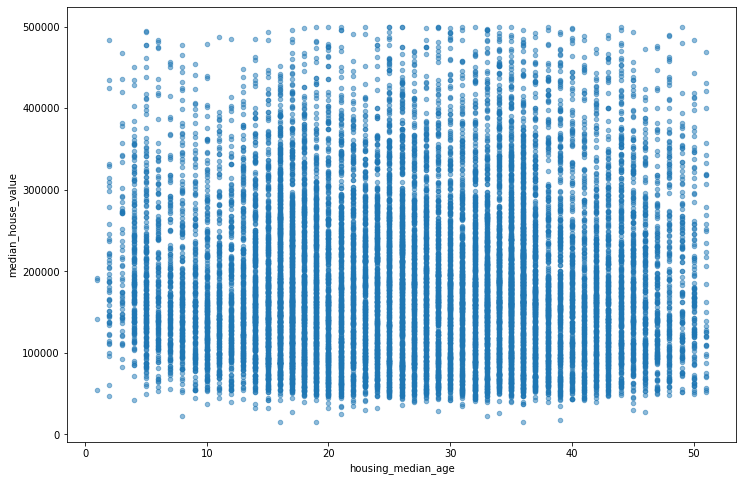

In [11]:
housing=housing[housing['housing_median_age']!=52]
housing.plot(kind="scatter",x="housing_median_age",y="median_house_value",alpha=0.5,figsize=(12,8))
#散点图可以看出房屋房龄与房屋价格中位数几乎没什么相关性

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

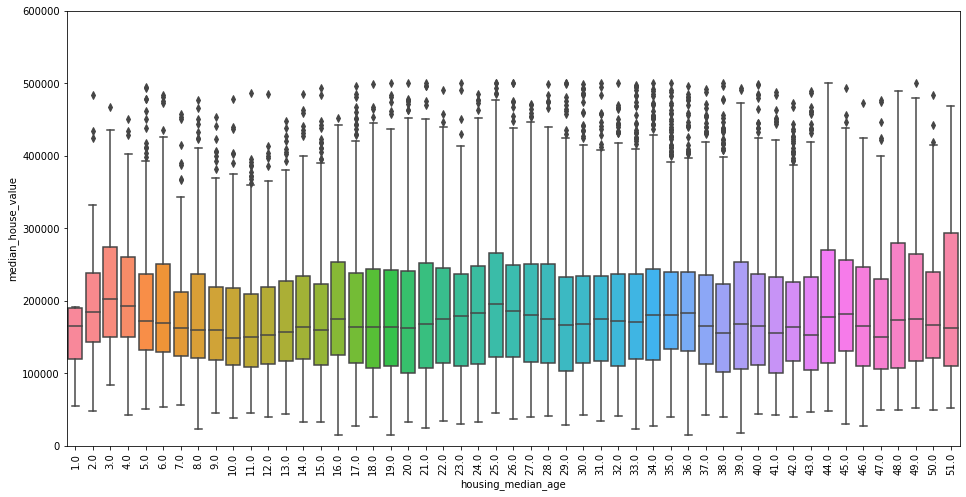

In [15]:
plt.subplots(figsize=(16, 8))
var = 'housing_median_age'
data = pd.concat([housing['median_house_value'], housing[var]], axis=1)
fig = sns.boxplot(x=var, y="median_house_value", data=data,saturation=1)
fig.axis(ymin=0, ymax=600000)
plt.xticks(rotation=90)

It is hard to make a conclusion that 'housing_median_age' and 'median_house_value' has linear relationship significant. 

# 1.3.3 The analysis of continuous input feature(households, population,total_bedrooms,total_rooms)

At first, we need to fill the missing value in the column of 'total_bedrooms'. 

In [16]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(),inplace=True)
#用中位数填充total_bedrooms空值
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18353 entries, 0 to 20639
Data columns (total 11 columns):
longitude                 18353 non-null float64
latitude                  18353 non-null float64
housing_median_age        18353 non-null float64
total_rooms               18353 non-null float64
total_bedrooms            18353 non-null float64
population                18353 non-null float64
households                18353 non-null float64
median_income             18353 non-null float64
median_house_value        18353 non-null float64
ocean_proximity           18353 non-null object
log_median_house_value    18353 non-null float64
dtypes: float64(10), object(1)
memory usage: 2.1+ MB


In accord with the situation of output label 'median_house_value', these four input feature do the log transformation, which makes the distribution approach to the normal.

In [17]:
housing['log_population']=np.log(housing['population'])
housing['log_households']=np.log(housing['households'])
housing['log_total_rooms']=np.log(housing['total_rooms'])
housing['log_total_bedrooms']=np.log(housing['total_bedrooms'])

# 1.3.4 The analysis of continuous input feature (longitude and latitude)

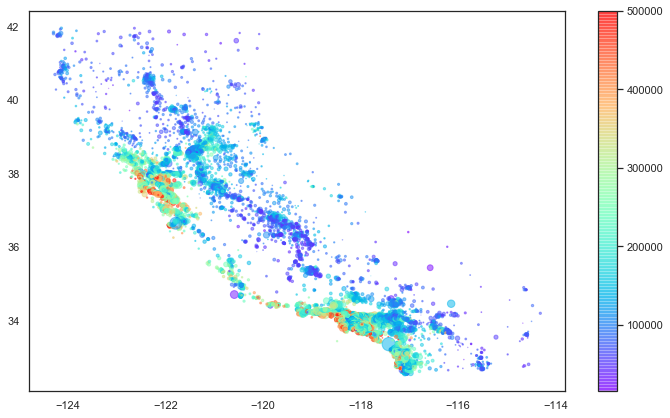

In [29]:
plt.rcParams['figure.figsize'] =(12,7)
cm = plt.cm.get_cmap('rainbow')
sc=plt.scatter(housing['longitude'],housing['latitude'],alpha=0.5,s=housing["population"]/200,c=housing["median_house_value"],cmap=cm)
#plt.title="population"
plt.colorbar(sc)
plt.show()

The horizontal axis is the column of longitude and the vertical axis represents the column of latitude. The size of the circle means the population of the area. The color implied the 'median_house_value '. 

# 1.3.5 The correlation matrix of all columns

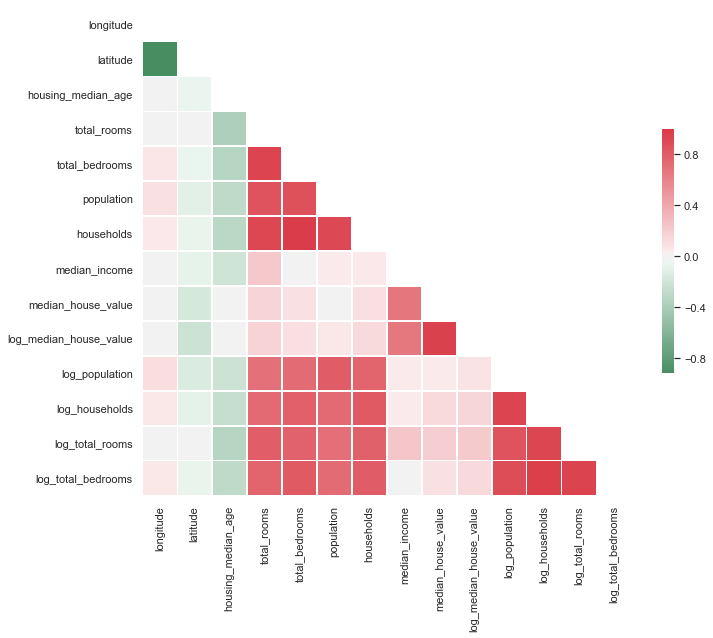

In [18]:
#查看相关性矩阵
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = pd.DataFrame(data=housing,
                 columns=list(housing.columns))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#房价和收入相关性较高，和房龄，经度相关性较低

It seems that the 'median_house_value' has linear relationship with 'median_income' ramarkable.

# 1.3.6 The selection of input feature and output label

In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_median_house_value,log_population,log_households,log_total_rooms,log_total_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,13.022764,5.774552,4.836282,6.779922,4.859812
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,12.789684,7.783641,7.037028,8.867709,7.008505
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,12.331383,7.095064,6.388561,7.845808,6.499787
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,11.849398,6.546785,5.575949,7.021084,5.645447
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,11.974771,6.897705,6.037871,7.713785,6.120297


离散型特征转换为虚拟变量

Last but not the least, dummy variables. In order to let the discrete input feature could be read and calculated by the algorithm, the categorical input needed to be converted into dummy variables.

In [31]:
housing=pd.get_dummies(housing)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,log_median_house_value,log_population,log_households,log_total_rooms,log_total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,13.022764,5.774552,4.836282,6.779922,4.859812,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,12.789684,7.783641,7.037028,8.867709,7.008505,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,12.331383,7.095064,6.388561,7.845808,6.499787,0,0,0,1,0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,11.849398,6.546785,5.575949,7.021084,5.645447,0,0,0,1,0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,11.974771,6.897705,6.037871,7.713785,6.120297,0,0,0,1,0


We choose the column of longitude, latitude,median_income, log_population,log_households,log_total_rooms,log_total_bedrooms,ocean_proximity as input feature and log_median_house_value as output label.

In [32]:
#选取longitude,latitude,median_income,log变形后的population,households,total_rooms,total_bedrooms,
#以及虚拟变量ocean_proximity作为输入特征（feature）
x_data=pd.concat([housing.loc[:,'median_income'],housing.loc[:,'longitude':'latitude'],housing.loc[:,'log_population':'ocean_proximity_NEAR OCEAN']],axis=1)
x_data.head()

,median_income,longitude,latitude,log_population,log_households,log_total_rooms,log_total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,8.3252,-122.23,37.88,5.774552,4.836282,6.779922,4.859812,0,0,0,1,0
1,8.3014,-122.22,37.86,7.783641,7.037028,8.867709,7.008505,0,0,0,1,0
8,2.0804,-122.26,37.84,7.095064,6.388561,7.845808,6.499787,0,0,0,1,0
15,2.1250,-122.26,37.85,6.546785,5.575949,7.021084,5.645447,0,0,0,1,0
18,1.9911,-122.26,37.84,6.897705,6.037871,7.713785,6.120297,0,0,0,1,0


In [33]:
#log变形后的median_house_value作为输出标签（label）
y_data=housing.loc[:,'log_median_house_value']
y_data.head()

0     13.022764
1     12.789684
8     12.331383
15    11.849398
18    11.974771
Name: log_median_house_value, dtype: float64

# 2.训练模型，模拟数据

Through the cross validation, we train and evaluate the four algorithm.

In [35]:
#利用交叉验证 查看线性回归模型下 输入特征对于输出标签的解释力度
import warnings;warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR=LinearRegression()
scores=cross_val_score(LR,x_data,y_data,cv=5)
print("linear regression:"+str(scores.mean()))

linear regression:0.5799724403187982


In [38]:
#梯度提升决策树
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
scores=cross_val_score(gbr,x_data,y_data,cv=5)
print("gradient boosting regressor:"+str(scores.mean()))

gradient boosting regressor:0.6234372404605344


In [39]:
#核支持向量机
from sklearn.svm import SVR
svr=SVR()
scores=cross_val_score(svr,x_data,y_data,cv=5)
print("svr:"+str(scores.mean()))

svr:0.6548153343896789


# 3.调整模型，参数寻优

By the means of grid search, we adjusted the parameter of the algorithm and raise the explanatory power of model.

In [40]:
param_grid={'C':[0.1,1,10],'gamma':[0.1,1,10]}
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

grid_search=GridSearchCV(SVR(),param_grid,cv=5)
x_trainval, x_test, y_trainval, y_test = train_test_split(x_data, y_data, random_state=0)
grid_search.fit(x_trainval,y_trainval)
print("svr:"+str(grid_search.score(x_test,y_test)))

svr:0.8077002995715925


In [41]:
grid_search.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.409341,0.011646,0.523652,0.001744,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.767975,0.787067,0.766960,0.765357,0.753429,0.768159,0.010805,4
1,3.987999,0.057544,0.526053,0.007322,0.1,1,"{'C': 0.1, 'gamma': 1}",0.732942,0.752265,0.741258,0.745734,0.735291,0.741499,0.007009,6
2,12.054605,0.114195,0.868687,0.005463,0.1,10,"{'C': 0.1, 'gamma': 10}",0.313259,0.330326,0.324430,0.334515,0.331167,0.326739,0.007483,9
3,3.970293,0.107260,0.502523,0.013758,1,0.1,"{'C': 1, 'gamma': 0.1}",0.788724,0.805441,0.784640,0.784549,0.780284,0.788728,0.008773,2
4,7.049560,0.204691,0.500930,0.004593,1,1,"{'C': 1, 'gamma': 1}",0.774229,0.788675,0.783036,0.787405,0.779615,0.782592,0.005276,3
5,36.550480,0.882879,0.801829,0.013960,1,10,"{'C': 1, 'gamma': 10}",0.506307,0.537668,0.528966,0.542237,0.531507,0.529337,0.012419,7
6,9.503150,0.112584,0.491649,0.002577,10,0.1,"{'C': 10, 'gamma': 0.1}",0.795749,0.807777,0.796421,0.795201,0.795132,0.798056,0.004883,1
7,28.962132,0.832263,0.508251,0.008566,10,1,"{'C': 10, 'gamma': 1}",0.749032,0.762324,0.768422,0.760941,0.754352,0.759015,0.006702,5
8,41.279844,0.616449,0.825682,0.003879,10,10,"{'C': 10, 'gamma': 10}",0.501547,0.533008,0.524347,0.536135,0.528831,0.524774,0.012273,8
